# 1. Eikonal equation

## 1.1 EE Scheme

### 1.1.1 Compute the consistency error of the scheme
From Taylor expansion, we have the following equations,
$$
\begin{aligned}
&\frac{U_j^{n+1}-U_j^n}{\Delta t} = v_t(t_{n+1}, x_j)+\mathcal{O}(\Delta t), \\
&\frac{U_j^n-U_{j-1}^n}{h} = v_x(t_n, x_j)+\mathcal{O}(h),\\
&-\frac{U_{j+1}^n-U_j^n}{h} = -v_x(t_n, x_j)+\mathcal{O}(h).
\end{aligned}
$$
Hence, we could write 
$$
\begin{aligned}
\mathcal{S}(t_{n+1}, x_j, U_j^{n+1}) 
=&\frac{U_j^{n+1}-U_j^n}{\Delta t}+max\biggl(c\frac{U_j^n-U_{j-1}^n}{h},-c\frac{U_{j+1}^n-U_j^n}{h}\biggr) \\
= &v_t(t_{n+1}, x_j)+\mathcal{O}(\Delta t)+max\biggl(cv_x(t_n, x_j),  -cv_x(t_n, x_j)\biggr)+\mathcal{O}(h)\\
= &v_t(t_{n+1}, x_j)+\mathcal{O}(\Delta t)+c|v_x(t_n, x_j)|+\mathcal{O}(h) 
\end{aligned}$$
Note that $v_x(t_{n+1}, x_j) = v_x(t_n, x_j) + \mathcal{O}(h)$, so we have
$$
\begin{aligned}
\mathcal{S}(t_{n+1}, x_j, U_j^{n+1}) 
&=v_t(t_{n+1}, x_j)+\mathcal{O}(\Delta t)+c|v_x(t_n, x_j)|+\mathcal{O}(h)\\
&=v_t(t_{n+1}, x_j)+\mathcal{O}(\Delta t)+c|v_x(t_{n+1}, x_j)|+\mathcal{O}(h)\\
&=\mathcal{H}(v)(t_{n+1}, x_j) + \mathcal{O}(\Delta t) + \mathcal{O}(h)
\end{aligned}$$
Hence,there exists a constant $c$, such that $|\epsilon_j^n| = \mathcal{O}(\Delta t) + \mathcal{O}(h)\leq C(\Delta t+h)$


### 1.1.2 Program the scheme
We can express the elements in the "max" by the matrix and vectors as following: 
$$(D^-U^n+q^-(t))_{1\leq i\leq I}=\biggl(c\frac{U_i^n-U_{i-1}^n}{h}\biggr)_{1\leq i\leq I}$$
$$(D^+U^n+q^+(t))_{1\leq i\leq I}=\biggl(c\frac{U_{i+1}^n-U_i^n}{h}\biggr)_{1\leq i\leq I},$$
where 
$$
D^- =
c\begin{pmatrix} 
1 & 0 & \cdots &0 & 0\\
-1 & 1 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0& \cdots  & 1 & 0 \\
0 & 0 &\cdots  & -1 & 1
\end{pmatrix},\;
q^- = 
c\begin{pmatrix} 
-U_0^n\\
 0\\
\vdots\\
0\\
0
\end{pmatrix},\;
D^+ =
c\begin{pmatrix} 
-1 & 1  & \cdots & 0 & 0\\
0 & -1  & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0& \cdots & -1 & 1 \\
0 & 0 &\cdots & 0 & -1
\end{pmatrix},\;
q^+ = 
c\begin{pmatrix} 
0\\
0\\
\vdots\\
0\\
U_{n+1}^n
\end{pmatrix}.
$$
So the iteration step is:
$$U_{n+1}=U_n-\Delta t\times max\left(D^-U^n+q^-(t),\, -(D^+U^n+q^+(t))\right),\; n=0, 1,\cdots, N-1$$

In [1]:
from utils_HJB import *

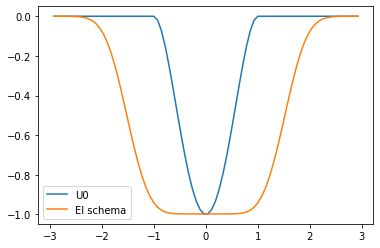

In [2]:
N = I = 80
EI = Eikonal(I, N, 1)
St = EI.St
U0 = v0(St)
U = EI.solve(U0)
plt.plot(St, U0, label='U0')
plt.plot(St, U, label='EI schema')
plt.legend()

### 1.1.3 Find the exact solution of the problem
The solution for $v_t+cv_x=0$ is $v(t,x)=v_0(x-ct)$, and the solution for $v_t-cv_x=0$ is $v(t,x)=v_0(x+ct)$. The exact solution is $v(t,x) = min_{y\in[x-ct, x+ct]}v_0(y)$. Since $v_0(y)$ is decreasing in $(-\infty, 0]$, increasing in $[0, \infty)$, we have therefore
$$v(t,x)=\begin{equation}
\left\{ 
  \begin{aligned}
   &v_0(x+ct),\; x<-ct;\\
   &v_0(0),\; x\in [-ct, ct]\\
   &v_0(x-ct), \; x>ct
  \end{aligned}
  \right.
\end{equation}
$$

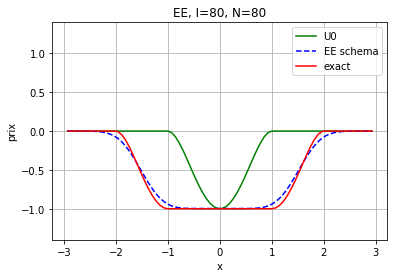

In [3]:
N = I = 80
schema_plot(I=I, N=N, T=1)

### 1.1.4 Show that the scheme is stable and monotone  
The schem is written as :
$$
\begin{aligned}
U_j^{n+1}&=U_j^n+\Delta t\max\left(-c\frac{U_j^n-U_{j-1}^n}{h},\, c\frac{U_{j+1}^n-U_j^n}{h}\right)\\
       &= (1-\frac{c\Delta t}{h})U_j^n + \max\left(\frac{U_{j-1}^n}{h}, \, \frac{U_{j+1}^n}{h}\right)\\
       &=F(U_{j-1}^n,\, U_j^n,\, U_{j+1}^n),\quad n=0,\cdots,N-1,\; j=1,\cdots, I
\end{aligned}
$$
$F$ is apparently motonon for $c\Delta t/h < 1$, which gives us a sufficent CFL condition: $N\sim I$.

To test this CFL condition, we try with different $\{N, I\}$ with $N=I/10$, $N=I$, $N=I^2$, respectively. And we plot the results as follwowing.

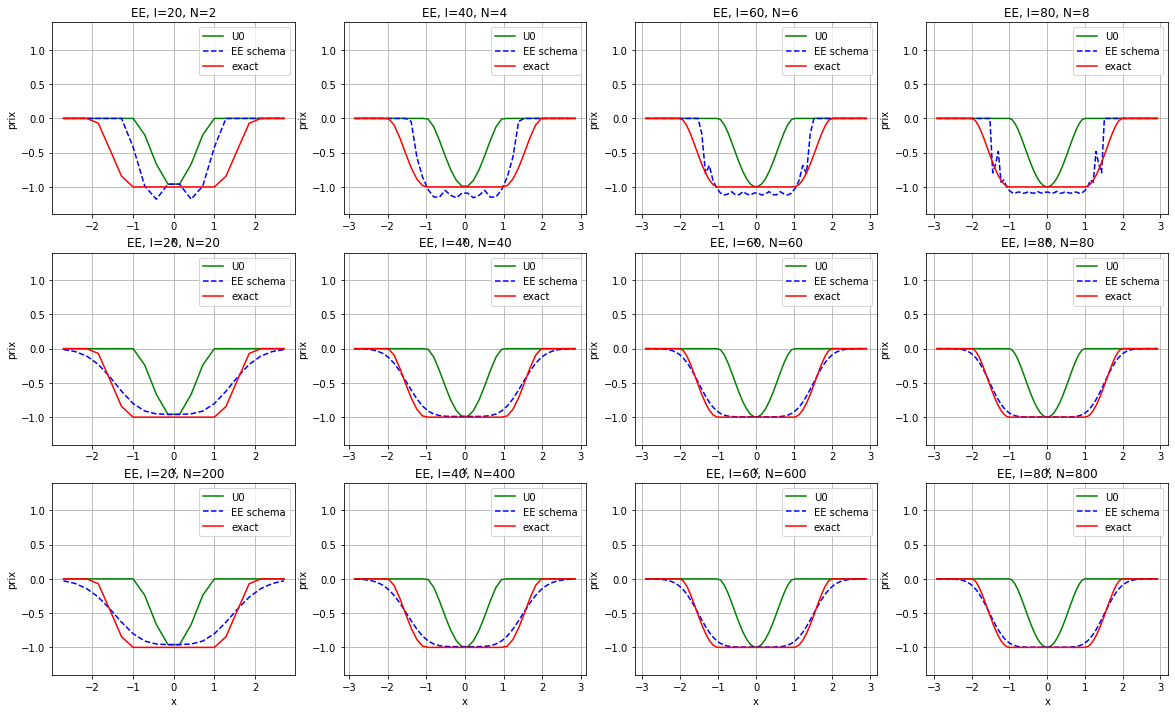

In [4]:
fig=plt.figure(figsize=(20, 12))
Is = range(20, 100, 20)
U_exact = np.array([exact(st) for st in St], dtype=object)

for k in range(4):
    I = Is[k%5]
    ax = plt.subplot(3, 4, k+1)
    schema_plot( N=I//10, I=I)
    ax = plt.subplot(3, 4, k+5)
    schema_plot( N=I, I=I)
    ax = plt.subplot(3, 4, k+9)
    schema_plot(N=I*10, I=I)


From the results above, we see clearly when:
- $N=\frac{I}{10}$, $|1-\frac{c\Delta t}{h}|$ might be bigger than 1, which violates the stable condition.
- $N=I$ or $N=I^2$, $|1-\frac{c\Delta t}{h}|<1$, hence the numerical solution is stable.

### 1.1.5 Estimate the error at the point $S_{val}=1.5$ and $T=1$ and the order of convergence

In [5]:
NI = np.array([10*2**k for k in range(10)])
U_s, e_k, order_alpha_k = evaluation(NI, NI)
print("exact value = ", exact(x=1.5))
table(NI, NI ,U_s, e_k, order_alpha_k,"EE", caption="N=I")

exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,10,10,-0.410595,-,-
1,20,20,-0.464520,-0.053925,-
2,40,40,-0.498080,-0.03356,0.761826
3,80,80,-0.522815,-0.024735,0.464563
4,160,160,-0.540109,-0.017294,0.53041
5,320,320,-0.550649,-0.01054,0.724115
6,640,640,-0.556412,-0.005763,0.87689
7,1280,1280,-0.559416,-0.003004,0.943118
8,2560,2560,-0.560948,-0.001532,0.973112
9,5120,5120,-0.561721,-0.000773,0.987711


### 1.1.6 Test also the schema on the following initial data
$$v_0(x)=(max(1-x^2,0))^2$$

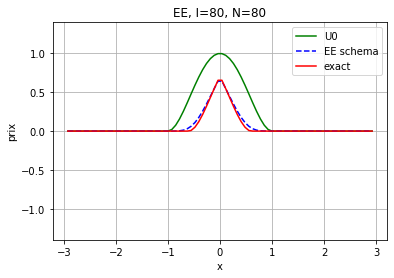

In [13]:
N = I = 80
schema_plot(I=I, N=N, T=0.4, neg=True)

## 1.2 Improve the order of consistency

### 1.2.1 Show that the basic attempt to improve the accuracy is not working

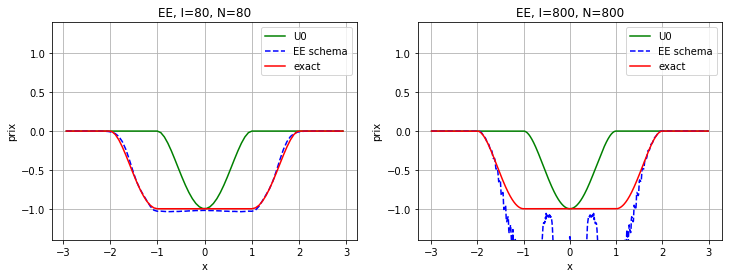

In [7]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,2,1)
schema_plot(I = 80, N = 80, q121=True)
ax2 = plt.subplot(1,2,2)
schema_plot(I = 800, N = 800, q121=True)

Replacing the previous schema by the new one, while using greater N and I, the numerical solution becomes unstable.  

### 1.2.2 Look for $a,\, b,\, c$ such that 
$$\phi_x(x_j)=\cfrac{a\phi(x_j)+b\phi(x_{j-1})+c\phi(x_{j-2})}{h}+\mathcal{O}(h^2)$$
Using the Talor expansion for $\phi(x)$ at $x=x_j$, we have
$$\phi(x_{j-1})=\phi(x_j)-\phi_x(x_j)h+\frac{1}{2}\phi_{xx}(x_j)h^2+\mathcal{O}(h^3),$$
and we have also 
$$\phi_{xx}(x_j) = \frac{\phi(x_j)-2\phi(x_{j-1})+\phi(x_{j-2})}{h^2}+\mathcal{O}(h).$$
After replacing the expression of $\phi_{xx}(x_j)$, we have 
$$\phi_x(x_j) = \frac{3\phi(x_j)-4\phi(x_{j-1})+\phi(x_{j-2})}{2h},$$
which leads to the values $a=3,\, b=-4,\, c= 1$.

### 1.2.3 Program the modified schema

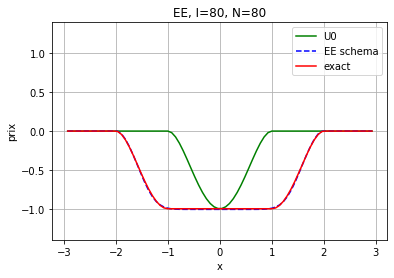

In [8]:
N = I = 80
schema_plot(I=I, N=N, schema='1')

### 1.2.4 Draw error table

In [9]:
NI = np.array([10*2**k for k in range(10)])
U_s, e_k, order_alpha_k = evaluation(NI, NI, monotone=False)
print("exact value = ", exact(x=1.5))
table(NI, NI ,U_s, e_k, order_alpha_k,"EE", caption="N=I")

exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,10,10,-0.617376,-,-
1,20,20,-0.599750,0.017626,-
2,40,40,-0.594289,0.005461,1.882229
3,80,80,-0.574169,0.02012,-1.985571
4,160,160,-0.560240,0.013929,0.545056
5,320,320,-0.560544,-0.000304,5.592937
6,640,640,-0.561256,-0.000712,-1.236133
7,1280,1280,-0.561800,-0.000544,0.389585
8,2560,2560,-0.562130,-0.00033,0.722361
9,5120,5120,-0.562310,-0.00018,0.875209


Compared with the ordinary EE schema, the error for the modified schema has been reduced and we can also observe the convergence of numerical solution.

$$
\begin{aligned}
U_j^{n+1}&=U_j^n+\Delta t\max\left(c\frac{3U_j^n-4U_{j-1}^n+U_{j-2}^n}{2h},\, c\frac{3U_j^n-4U_{j+1}^n+U_{j+2}^n}{2h}\right)\\
       &= (1+\frac{3c\Delta t}{2h})U_j^n + \max\left(c\frac{-4U_{j-1}^n+U_{j-2}^n}{2h}, \, c\frac{-4U_{j+1}^n+U_{j+2}^n}{2h}\right)\\
       &=F(U_{j-2}^n,\, U_{j-1}^n,\, U_j^n,\, U_{j+1}^n,\, U_{j+2}^n),\quad n=0,\cdots,N-1,\; j=1,\cdots, I
\end{aligned}
$$
$F$ is hence not motonon.

### 1.2.5 RK2 variant

Note $U^{n,1}=U^n+\Delta tL(t_n, U^n)$<br>
We have 
$$
\begin{aligned}
U^{n+1}&=\frac{1}{2}(U^n+S^1(S^1(U^n)))\\
&=\frac{1}{2}U^n+\frac{1}{2}S^1(U^n+\Delta tL(t_n, U^n))\\
&=\frac{1}{2}U^n+\frac{1}{2}[(U^n+\Delta tL(t_n, U^n))+\Delta tL(t_{n+1}, U^n+\Delta tL(t_n, U^n))]\\
&=U^n+\frac{\Delta t}{2}(L(t_n, U^n)+L(t_{n+1}, U^{n, 1}))
\end{aligned}
$$
Therefore, this schema corresponds to an RK2 scheme.

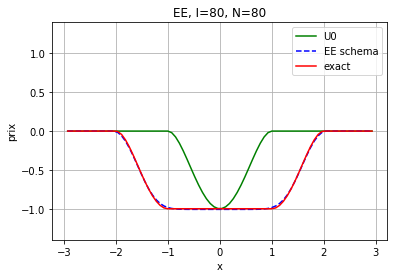

In [10]:
N = I = 80
schema_plot(I=I, N=N, schema='RK2')

In [11]:
NI = np.array([10*2**k for k in range(10)])
U_s, e_k, order_alpha_k = evaluation(NI, NI, RK2=True)
print("exact value = ", exact(x=1.5))
table(NI, NI ,U_s, e_k, order_alpha_k,"EE", caption="N=I")

exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,10,10,-0.410595,-,-
1,20,20,-0.464520,-0.053925,-
2,40,40,-0.498080,-0.03356,0.761826
3,80,80,-0.522815,-0.024735,0.464563
4,160,160,-0.540109,-0.017294,0.53041
5,320,320,-0.550649,-0.01054,0.724115
6,640,640,-0.556412,-0.005763,0.87689
7,1280,1280,-0.559416,-0.003004,0.943118
8,2560,2560,-0.560948,-0.001532,0.973112
9,5120,5120,-0.561721,-0.000773,0.987711


## 1.3 IE Scheme

### 1.3.1 What's the consistency error of the schema ?

With similar analysis to the first explicit Euler scheme, the consistency error is still of order 1 in time and order 1 in space.

### 1.3.2 Program the IE scheme

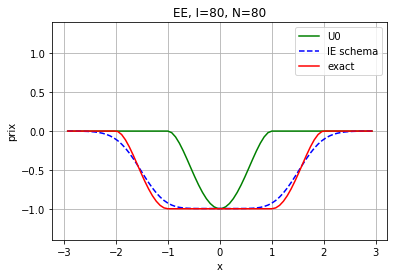

In [12]:
N = I = 80
schema_plot_IE(I=I, N=N, schema='newton')

In [5]:
Is = np.array([20, 40, 80, 160, 360, 720])
U_s, e_k, order_alpha_k = evaluation_IE(Is = Is, Ns = Is)
print("exact value = ", exact(x=1.5))
table(Is, Is ,U_s, e_k, order_alpha_k,"IE", caption="N=I")


exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,20,20,-0.479289,-,-
1,40,40,-0.506967,-0.027678,-
2,80,80,-0.527366,-0.020399,0.464619
3,160,160,-0.542404,-0.015038,0.451923
4,360,360,-0.553063,-0.010659,0.595318
5,720,720,-0.557708,-0.004645,0.911312


In [6]:
U_s, e_k, order_alpha_k = evaluation_IE(Is = Is, Ns = Is//10)
print("exact value = ", exact(x=1.5))
table(Is, Is//10 ,U_s, e_k, order_alpha_k,"IE", caption="N=I/10")

,I,N,U(s),e_k,order alpha_k
0,20,2,-0.419287,-,-
1,40,4,-0.461938,-0.042651,-
2,80,8,-0.493825,-0.031887,0.442846
3,160,16,-0.519190,-0.025365,0.339163
4,360,36,-0.540596,-0.021406,0.293527
5,720,72,-0.551322,-0.010726,0.758135


We compute the error tables with $N=I$ and $N=I/10$ here, there is no problem of stability.

### 1.3.3 Check the stability of the scheme inconditionnally with respect to the mesh steps

To chech the stability of the scheme inconditionnally with respect to the mesh steps, we test eith different pairs of $\{I, N\}$ as before, and we plot the results as following.

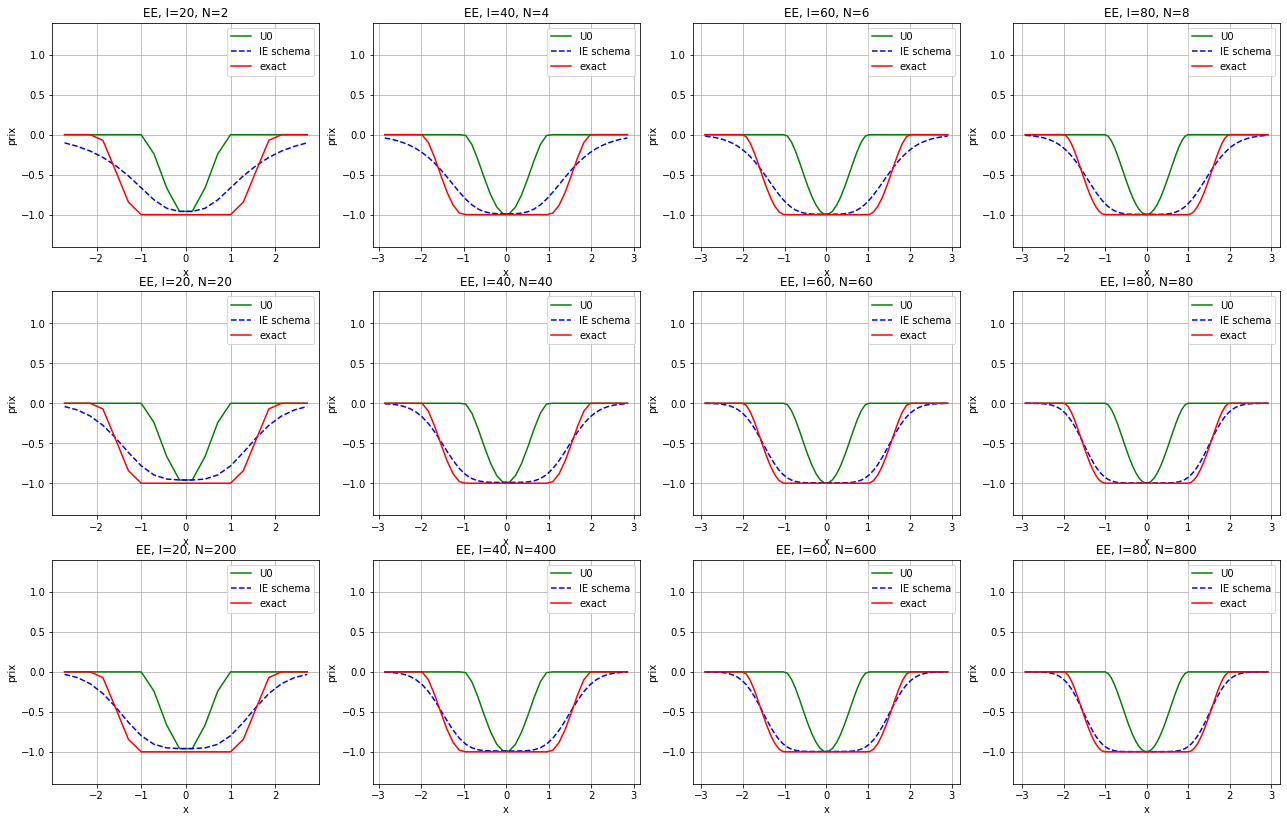

In [13]:
fig=plt.figure(figsize=(22, 14))
Is = range(20, 100, 20)
U_exact = np.array([exact(st) for st in St], dtype=object)

for k in range(4):
    I = Is[k%5]
    ax = plt.subplot(3, 4, k+1)
    schema_plot_IE( N=I//10, I=I)
    ax = plt.subplot(3, 4, k+5)
    schema_plot_IE( N=I, I=I)
    ax = plt.subplot(3, 4, k+9)
    schema_plot_IE(N=I*10, I=I)

With different pairs of $\{I, N\}$, we can always observe the stability of numerical solution

## 1.4 Implicit second order variant

After simplification, schema (10) can be written as :
$$max\{(3I+2\Delta tcD^-)U^{n+1}-(4U^{n}-U^{n-1}), (3I-2\Delta tcD^+)U^{n+1}-(4U^{n}-U^{n-1})\}=0$$

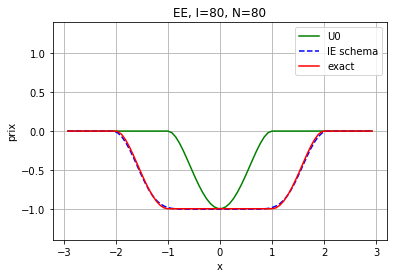

In [2]:
N = I = 80
schema_plot_IE(I=I, N=N, schema='second_order')

In [3]:
Is = np.array([20, 40, 80, 160, 360, 720])
U_s, e_k, order_alpha_k = evaluation_IE(Is = Is, Ns = Is, schema='second_order')
print("exact value = ", exact(x=1.5))
table(Is, Is ,U_s, e_k, order_alpha_k,"IE_second_order", caption="N=I")

exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,20,20,-0.594305,-,-
1,40,40,-0.595371,-0.001066,-
2,80,80,-0.581841,0.01353,-3.868872
3,160,160,-0.566920,0.014921,-0.145046
4,360,360,-0.563465,0.003455,2.530446
5,720,720,-0.562748,0.000717,1.725279


In [4]:
U_s, e_k, order_alpha_k = evaluation_IE(Is = Is, Ns = Is//10, schema='second_order')
print("exact value = ", exact(x=1.5))
table(Is, Is//10 ,U_s, e_k, order_alpha_k,"IE_second_order", caption="N=I/10")

exact value =  -0.5625


,I,N,U(s),e_k,order alpha_k
0,20,2,-0.440770,-,-
1,40,4,-0.480875,-0.040105,-
2,80,8,-0.515647,-0.034772,0.217255
3,160,16,-0.546612,-0.030965,0.171865
4,360,36,-0.559469,-0.012857,1.520345
5,720,72,-0.561753,-0.002284,1.89584


We compute the error tables with $N=I$ and $N=I/10$ here, there is no problem of stability.
We can also observe that the second order scheme has significantly reduced the error.

# 2. Simple uncertain volatility model

## 2.1 Euler Explicit schema

### 2.1.1 What's the consistency error of this schema ?
We have $v_t(t, x_j) = \cfrac{v_j^{n+1}-v_j^n}{\Delta t}+\mathcal{O}(\Delta t)$, $v_{xx}(t, x_j) = \cfrac{v(t, x_j)-2v(t, x_{j-1})+v(t, x_{j-2})}{h^2}+\mathcal{O}(h).$
Hence the consistency error still satisfies:
$$
\begin{aligned}
|\epsilon_j^n| &\leq \left|v_t(t, x_j)-\cfrac{v_j^{n+1}-v_j^n}{\Delta t}\right|+\left|v_{xx}(t, x_j)-\cfrac{v(t, x_j)-2v(t, x_{j-1})+v(t, x_{j-2})}{h^2}\right| \\
&\leq \mathcal{O}(\Delta t + h))
\end{aligned}
$$

In [2]:
from utils_simple_vol import *

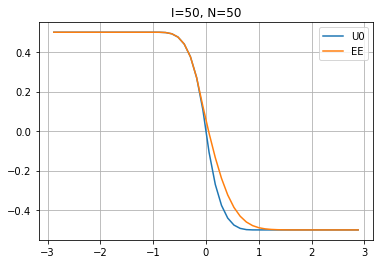

In [3]:
N = I = 50
schema_plot(I=I,N=N)

## 2.2 Implicit Euler scheme 

Scheme (13) can be written as :
$$min\{(I-\frac{1}{2}\Delta t\sigma^2D^2)U^{n+1}-U^n-\frac{1}{2}\sigma^2\Delta tq,\ U^{n+1}-U^n\}=0$$
We can define 

$$
\begin{aligned}
&B = I-\frac{1}{2}\Delta t\sigma^2D^2, \\
&b=U^n+\frac{1}{2}\sigma^2\Delta tq, \\
&c=U^n
\end{aligned}
$$
Then (13) can be simplified as <br> 
$$min\left(Bx-b, x-c\right)=0$$
We plot the simulatio results with differetn mesh parameters.

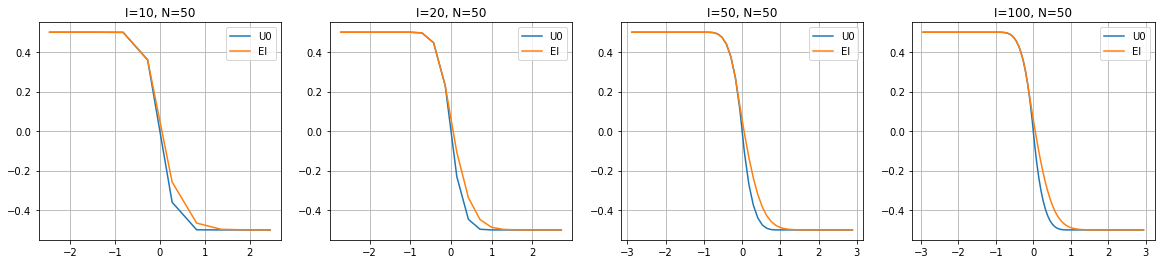

In [4]:
N =  50
Is = np.array([10, 20, 50, 100])
fig = plt.figure(figsize=(20, 4))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    schema_plot(I=Is[i],N=N, schema="EI")

## 2.3 Second order scheme
### Butterfly option pricing with uncertain volatility

We seek to approximate the price of a financial option under a Black Scholes model with uncertain volatility. In particular, we aim to find the price associated with the worst scenario for a“butterfly spread”with respect to all the possible values of the volatility $\sigma$ in the interval $[\sigma_{\min},\,\sigma_{\max}]$. This problem is associated with the following PDE in $\mathbb{R}_+\times(0, T)$ for some expiry $T>0$:
$$
\begin{aligned}
v_t+\sup_{\sigma\in[\sigma_{min} \;,\, \sigma_{max}]}(-\frac{\sigma^2}{2}x^2v_{xx})-rxv_x+rv&=0,\\
v(0,x)&=v_0(x),
\end{aligned}$$
where 
$$v_0(x)=\max(x-K_1,\, 0)-2\max(x-(K_1+K_2)/2,\, 0)+\max(x-K_2,\,0)$$

Here we use the first order and second order scheme to solve this problem respectively.

**1) The first-order Euler implict scheme** to this problem can be written as:

$$\frac{U_j^{n+1}-U_j^n}{\Delta t} - \min_{\sigma\in[\sigma_{min} \;,\, \sigma_{max}]}\left(\frac{\sigma^2}{2}x_j^2D^2U_j^{n+1}\right)-rx_j\frac{U_j^{n+1}-U_{j-1}^{n+1}}{h} +rU_j^{n+1} = 0$$

or, $$\min_{\sigma\in[\sigma_{min} \;,\, \sigma_{max}]}\left([-(r+\frac{1}{\Delta t})I+\frac{\sigma^2}{2}(diag(x))^2D^2 +r\cdot diag(x)A^-)]U^{n+1}+\frac{1}{\Delta t}U^n\right)=0$$

Hence we have $\min\left(BU^{n+1}-c, CU^{n+1}-c\right)=0,$
where

$$\begin{aligned}
&diag(x) = diag(x_1, x_2, \cdots, \, x_{I})\\
&A^- = \frac{1}{h}tridiag(-1, 1, 0),\\
&B = -(r\Delta t+1)I+\Delta t\frac{\sigma_{min}^2}{2}(diag(x))^2D^2 +r\Delta t\cdot diag(x)A^-,\\
&C = -(r\Delta t+1)I+\Delta t\frac{\sigma_{max}^2}{2}(diag(x))^2D^2 +r\Delta t\cdot diag(x)A^-,\\
&c = -U^n.
\end{aligned}
$$

**2) The second order scheme.** 

This problem corresponds to the HJB equation with $b=-rx,\, f = r$, and $l=0$.

Hence the BDF2 schme can be written in the form 

$$\frac{3U^{n+1}-4U^n+U^{n-1}}{2\Delta t}+\sup_{\sigma\in[\sigma_{min}\;,\sigma_{max}]}\left(-\frac{1}{2}\sigma^2(diag(x))^2D^2U^{n+1}\right)+b^+D^{-}U^{n+1}-b^-D^{+}U^{n+1}+rU^{n+1}=0$$
where $b^+ = \max(b,\,0),\;b^-=\max(-b,\, 0)$.
This equals to

$$
\min_{\sigma\in[\sigma_{min}\;,\sigma_{max}]}(-\frac{3U^{n+1}-4U^n + U^{n-1}}{2\Delta t} + \frac{1}{2}\sigma^2(diag(x))^2D^2U^{n+1} - (b^+D^--b^-D^+)U^{n+1}-rU^{n+1})= \min(BU^{n+1}-c,\,CU^{n+1}-c)=0,
$$

where
$$
\begin{aligned}
&B = -(3/2\Delta t+r)I+\sigma_{max}^2(diag(x))^2D^2-b^+D^-+b^-D^+,\\
&C = -(3/2\Delta t+r)I+\sigma_{max}^2(diag(x))^2D^2-b^+D^-+b^-D^+,\\
&c = (-4U^n+U^{n-1})/(2\Delta t).
\end{aligned}
$$

We use the same paramters given in the paper:

 | $r$ | $\sigma_{min}$ | $\sigma_{max}$ | $T$  | $K_1$ | $K_2$ |
 | ----| ---- |----|----|-----| ----- |
 | $0.1$ | $0.15$ | $0.25$ | $0.1$ | $90$ | $110$ |


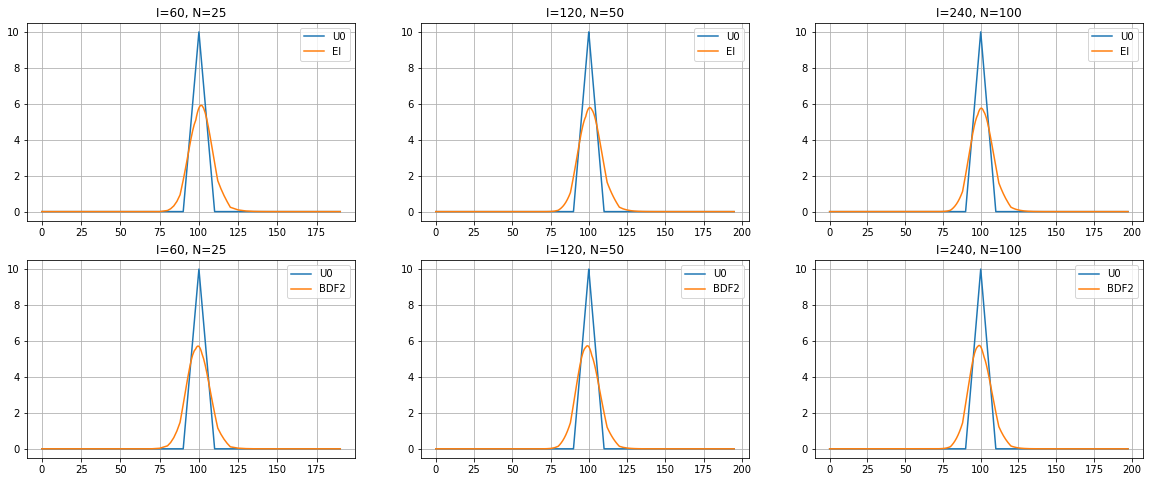

In [5]:
from utils_butterfly import *
# schema_plot_butterfly(120, 50, "BDF2")
fig = plt.figure(figsize = (20, 8))
Is = 60*2**np.arange(3)
Ns = 25*2**np.arange(3)
for i in range(3):
    ax1 = plt.subplot(2, 3, i+1)
    schema_plot_butterfly(I=Is[i], N=Ns[i], schema="EI")
    ax2 = plt.subplot(2, 3, i+4)
    schema_plot_butterfly(I=Is[i], N=Ns[i], schema="BDF2")